In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./IMDB Dataset.csv')

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
# df.head()

In [5]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [6]:
# df.drop_duplicates(keep='first', inplace=True)

In [7]:
# df.describe()

In [8]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [9]:
import nltk
nltk.download('stopwords','punkt')

[nltk_data] Downloading package stopwords to punkt...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from bs4 import BeautifulSoup
import re
import string

In [12]:
def strip_html(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
df['review'] = df['review'].apply(denoise_text)

In [13]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [14]:
def process_text(text):
    text = denoise_text(text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = text.lower().replace('\n', ' ').replace('\r','').strip()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # text = re.sub(r'[\w\s]','',text)
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    
    stemmer = SnowballStemmer('english')
    stemmed = [stemmer.stem(w) for w in tokens if w not in stop_words]
    text =  ' '.join(stemmed)
    return text

In [15]:
process_text("I'm gonna be home twnty 20 soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today. 34")

'gon na home twnti soon want talk stuff anymor tonight k cri enough today'

In [16]:
df['parsed_review'] = df['review'].apply(process_text)

c:\Users\GritFeat\AppData\Local\Programs\Python\Python310\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [17]:
df.head()

,review,sentiment,parsed_review
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod hook right ...
1,A wonderful little production. The filming tec...,positive,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...


In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['sentiment_category'] = encoder.fit_transform(df['sentiment'])

In [ ]:
# train_reviews = df['parsed_review'][:40000]
# train_sentiments = df['sentiment_category'][:40000]
# test_reviews = df['parsed_review'][40000:]
# test_sentiments = df['sentiment_category'][40000:]
# print(train_reviews.shape, train_sentiments.shape, test_reviews.shape, test_sentiments.shape)

(40000,) (40000,) (10000,) (10000,)


In [19]:
df.head()

,review,sentiment,parsed_review,sentiment_category
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod hook right ...,1
1,A wonderful little production. The filming tec...,positive,wonder littl product film techniqu unassum old...,1
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...,1
3,Basically there's a family where a little boy ...,negative,basic famili littl boy jake think zombi closet...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...,1


In [20]:
df.to_csv('processed.csv')

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
train_reviews, test_reviews, train_labels, test_labels = train_test_split(df['parsed_review'], df['sentiment_category'], test_size=0.2, random_state=101)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
cv = CountVectorizer(min_df=0,max_df=1, binary=False, ngram_range=(1,3))
cv_train_reviews = cv.fit_transform(train_reviews)
print(cv_train_reviews.shape)

(40000, 5756342)


In [25]:
tfidf = TfidfVectorizer(encoding='utf-8', min_df=10, max_df=0.9, binary=False, ngram_range=(1,3), stop_words=None, lowercase=False, norm='l2', sublinear_tf=True)
tfidf_train_reviews = tfidf.fit_transform(train_reviews)
print(tfidf_train_reviews.shape)

(40000, 70241)


In [27]:
from wordcloud import WordCloud
wc = WordCloud(background_color='white', max_words=2000,width = 800, height=800, min_font_size=10)

In [58]:
print(df[df['sentiment_category']==0]['parsed_review'].head().str.cat(sep=' ')) ## concatenate all the reviews of the negative class

basic famili littl boy jake think zombi closet parent fight time movi slower soap opera sudden jake decid becom rambo kill zombi ok first go make film must decid thriller drama drama movi watchabl parent divorc argu like real life jake closet total ruin film expect see boogeyman similar movi instead watch drama meaningless thriller spot well play parent descent dialog shot jake ignor show amaz fresh innov idea first air first year brilliant thing drop show realli funni anymor continu declin complet wast time today truli disgrac far show fallen write pain bad perform almost bad mild entertain respit guest host show probabl still air find hard believ creator hand select origin cast also chose band hack follow one recogn brillianc see fit replac mediocr felt must give star respect origin cast made show huge success show aw believ still air encourag posit comment film look forward watch film bad mistak seen film truli one worst aw almost everi way edit pace storylin act soundtrack film son

In [43]:
positive_wc = wc.generate(df[df['sentiment_category'] == 1]['parsed_review'].str.cat(sep=' '))


In [44]:
import matplotlib.pyplot as plt

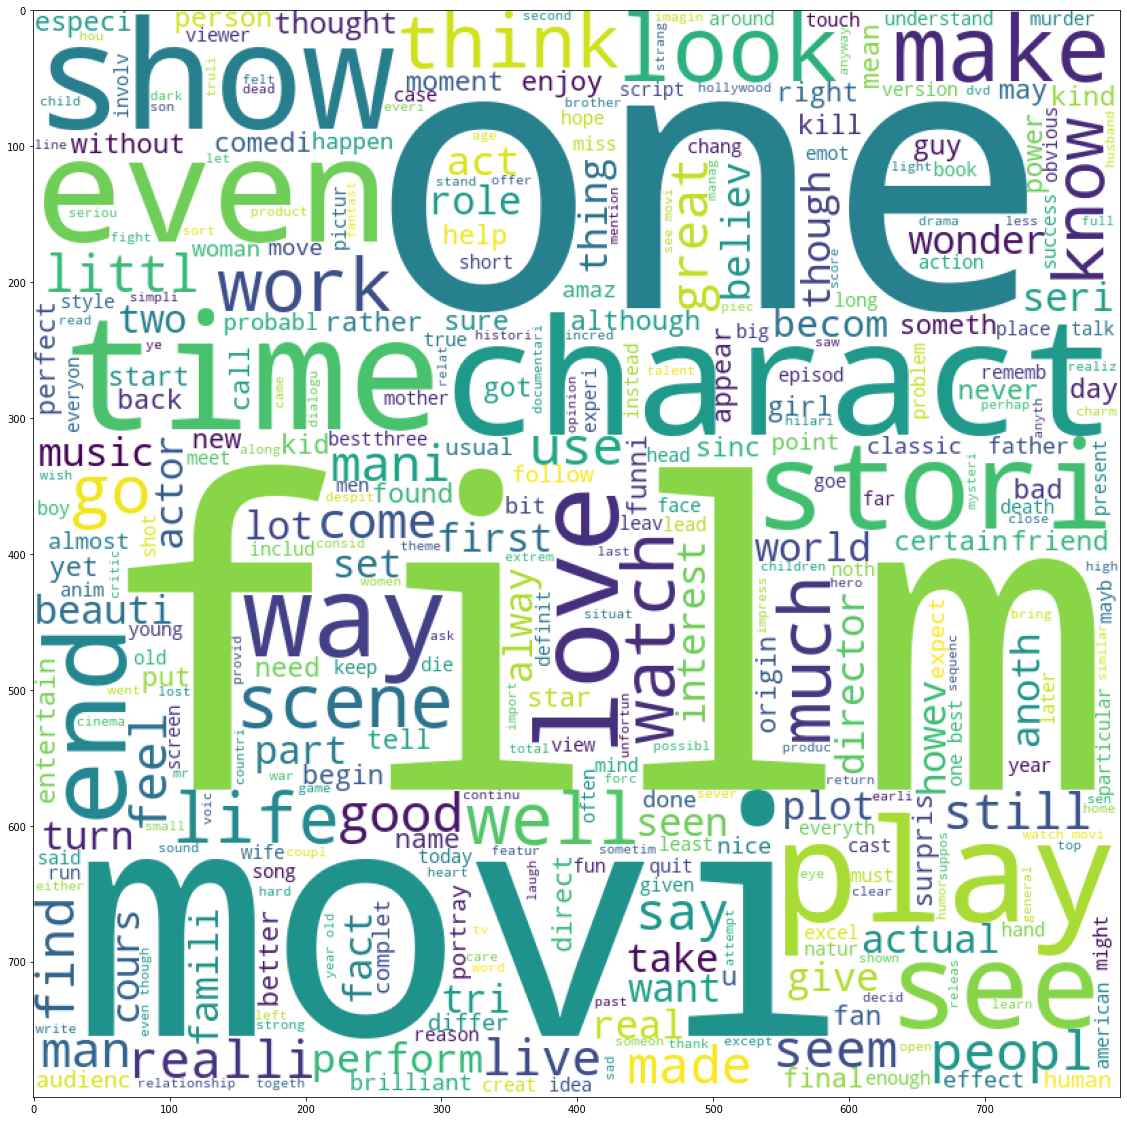

In [45]:
plt.figure(figsize=(20,20))
plt.imshow(positive_wc)


In [46]:
negative_wc = wc.generate(df[df['sentiment_category'] == 0]['parsed_review'].str.cat(sep=' '))

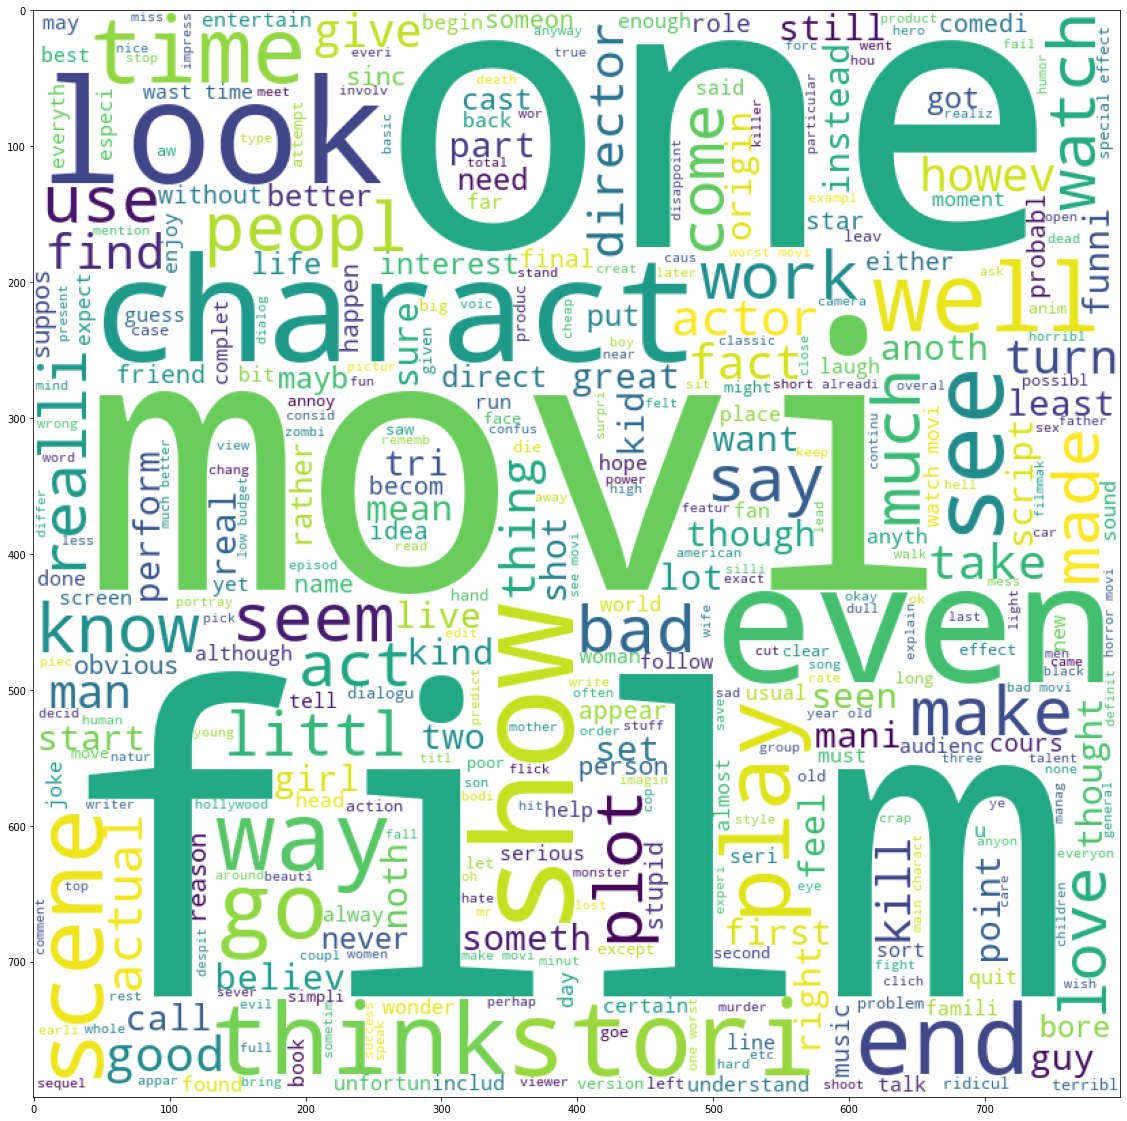

In [34]:
plt.figure(figsize=(20,20))
plt.imshow(negative_wc)

In [48]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))